In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

X_train = np.load('../pro_data/X_train_cluster.npy') #0.9079
y_train_pre = np.load('../pro_data/y_encoded_train_cluster.npy')
y_train = np.argmax(y_train_pre, axis=1)
X_test = np.load('../pro_data/X_test_cluster.npy')
y_test_pre = np.load('../pro_data/y_encoded_test_cluster.npy')
y_test = np.argmax(y_test_pre, axis=1)


X_train_no_outlier = np.load('../pro_data/X_train_no_outliers.npy')
X_test_no_outlier = np.load('../pro_data/X_test_no_outliers.npy')
y_train_no_outlier = np.load('../pro_data/y_train_no_outliers.npy')
y_test_no_outlier = np.load('../pro_data/y_test_no_outliers.npy')

X_train_noisy = np.load('../pro_data/X_train_noisy.npy')  #0.9014
y_train_noisy = np.load('../pro_data/y_train_noisy.npy')
X_test_noisy = np.load('../pro_data/X_test_noisy.npy')
y_test_noisy = np.load('../pro_data/y_test_noisy.npy')

X_train_augmented = np.load('../pro_data/X_train_augmented.npy') #0.8945
y_train_augmented = np.load('../pro_data/y_train_augmented.npy')
X_test_augmented = np.load('../pro_data/X_test_augmented.npy')
y_test_augmented = np.load('../pro_data/y_test_augmented.npy')




sample_size = 15000 #10888 in total
if len(X_train) > sample_size:
    indices = np.random.choice(len(X_train), sample_size, replace=False)
    X_sample = X_train[indices]
    y_sample = y_train[indices]
else:
    X_sample = X_train
    y_sample = y_train



In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# clf = DecisionTreeClassifier(
#     criterion='gini',        # 或 "entropy"
#     max_depth= max_depths,          # 控制树的最大深度，避免过拟合
#     random_state=42
# )

tree = DecisionTreeClassifier(
    criterion='entropy',       
    max_depth= 8,   
    min_samples_split=10,  # 最小分割样本数
    min_samples_leaf=2,     
    random_state=42
)

# print("y_train shape:", y_train.shape)
# print("y_train_augmented shape:", y_train_augmented.shape)



tree.fit(X_train_augmented, y_train_augmented)


y_pred = tree.predict(X_test_augmented)

# 准确率
print(f"Accuracy: {accuracy_score(y_test_augmented, y_pred):.4f}")

# 分类报告（包括精确率、召回率、F1等）
print("\nClassification Report:")
print(classification_report(y_test_augmented, y_pred))

# 混淆矩阵
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()


Accuracy: 0.8945

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       406
           1       0.00      0.00      0.00         0
           2       0.94      0.93      0.93       514
           3       0.90      0.92      0.91      1354
           4       0.95      0.91      0.93       447
           5       0.93      0.88      0.91       443
           6       0.88      0.85      0.87      1074

   micro avg       0.91      0.89      0.90      4238
   macro avg       0.79      0.77      0.78      4238
weighted avg       0.91      0.89      0.90      4238
 samples avg       0.89      0.89      0.89      4238



d:\anaconda\envs\ML_PROJECT\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\envs\ML_PROJECT\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\envs\ML_PROJECT\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\envs\ML_PROJECT\Lib\

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 定义超参数搜索空间
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 6, 7, 8, 9, 10, 20, 30],
    'min_samples_split': [1, 2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 初始化模型
dtree = DecisionTreeClassifier(random_state=42)

# 网格搜索 + 5折交叉验证
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 输出最优参数
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


d:\anaconda\envs\ML_PROJECT\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\envs\ML_PROJECT\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\anaconda\envs\ML_PROJECT\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\anaconda\envs\ML_PROJECT\Lib\site-packages\sklearn\base.py", line 436, in _vali

Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 初始化逻辑回归模型
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# 训练模型
logreg.fit(X_train, y_train)

# 全部数据集合
X_all = np.concatenate([X_train, X_test], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)

# 预测
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
y_pred_all = logreg.predict(X_all)

# 准确率
print("🔹 Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("🔹 Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("🔹 Overall Accuracy:", accuracy_score(y_all, y_pred_all))


🔹 Training Accuracy: 0.9254749658864281
🔹 Testing Accuracy: 0.922869735553379
🔹 Overall Accuracy: 0.9246932628021454


In [ ]:
def evaluate_model(y_true, y_pred, title):
    print(f"\n📊 Classification Report - {title}")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# 分别评估
evaluate_model(y_train, y_pred_train, "Training Set")
evaluate_model(y_test, y_pred_test, "Testing Set")
evaluate_model(y_all, y_pred_all, "Entire Dataset")


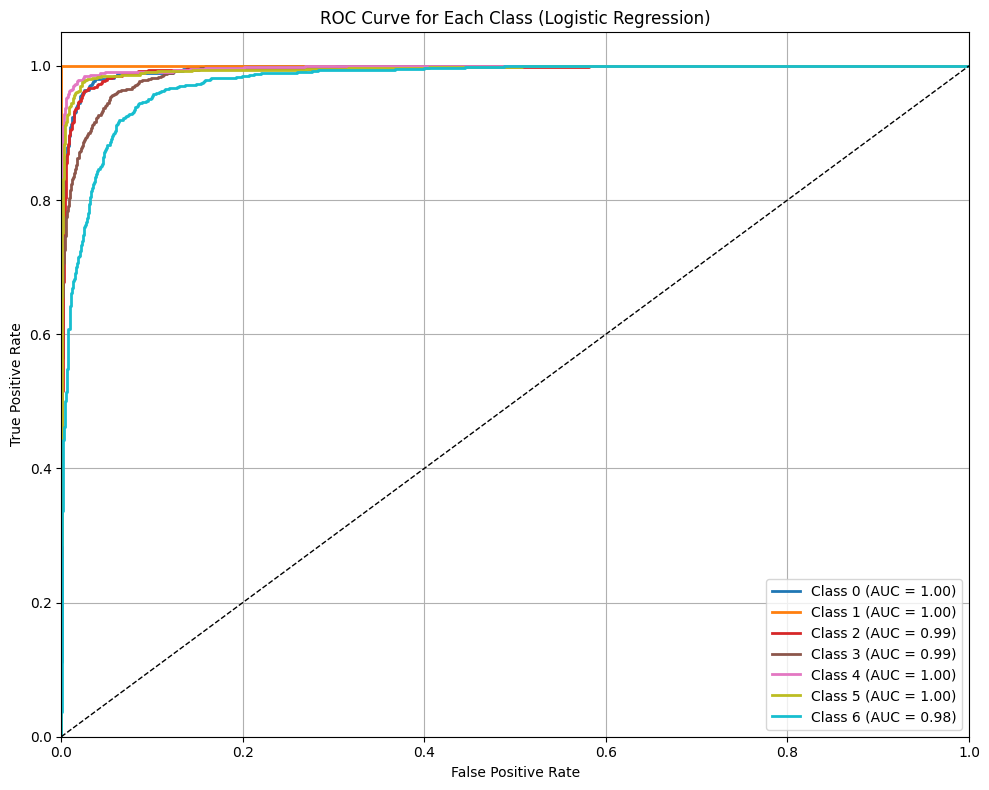

🌐 Micro-average AUC: 0.9940
🌐 Macro-average AUC: 0.9928


In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


n_classes = y_train_pre.shape[1]
# 使用 One-vs-Rest 策略构建多类别逻辑回归
clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
clf.fit(X_train, y_train_pre)

# 获取每类的预测概率
y_score = clf.predict_proba(X_test)
# 为每个类计算 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_pre[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘图
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)  # 参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class (Logistic Regression)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_auc_score

# 微平均 AUC
micro_auc = roc_auc_score(y_test_pre, y_score, average='micro')

# 宏平均 AUC
macro_auc = roc_auc_score(y_test_pre, y_score, average='macro')

print(f"🌐 Micro-average AUC: {micro_auc:.4f}")
print(f"🌐 Macro-average AUC: {macro_auc:.4f}")
